<a href="https://colab.research.google.com/github/Mritunjay21/Air_line-customer-satisfaction/blob/main/airline_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
!pip install light-the-torch >> /.tmp
!ltt install torch torchvision >> /.tmp
!pip install fastai --upgrade >> /.tmp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [ ]:
df.shape

(129880, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

=> Arrival delay in Minutes has some null values.

In [ ]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [ ]:
check(df)

,column,dtypes,nunique,sum_null
0,satisfaction,object,2,0
1,Gender,object,2,0
2,Customer Type,object,2,0
3,Age,int64,75,0
4,Type of Travel,object,2,0
5,Class,object,3,0
6,Flight Distance,int64,5398,0
7,Seat comfort,int64,6,0
8,Departure/Arrival time convenient,int64,6,0
9,Food and drink,int64,6,0


=> We can see the null and unique values in the dataset.

In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.duplicated().sum()

0

=> No duplicated rows

# Filling missing values

In [ ]:
(df.isna().sum() * 100) / df.shape[0]

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

Only 0.3% are missing values in arrival delay

In [ ]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean()) #Filling values with mean

In [ ]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# EDA

#Outlier Detection and Removal

In [ ]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

=> Converted all the non-numeric columns to numeric

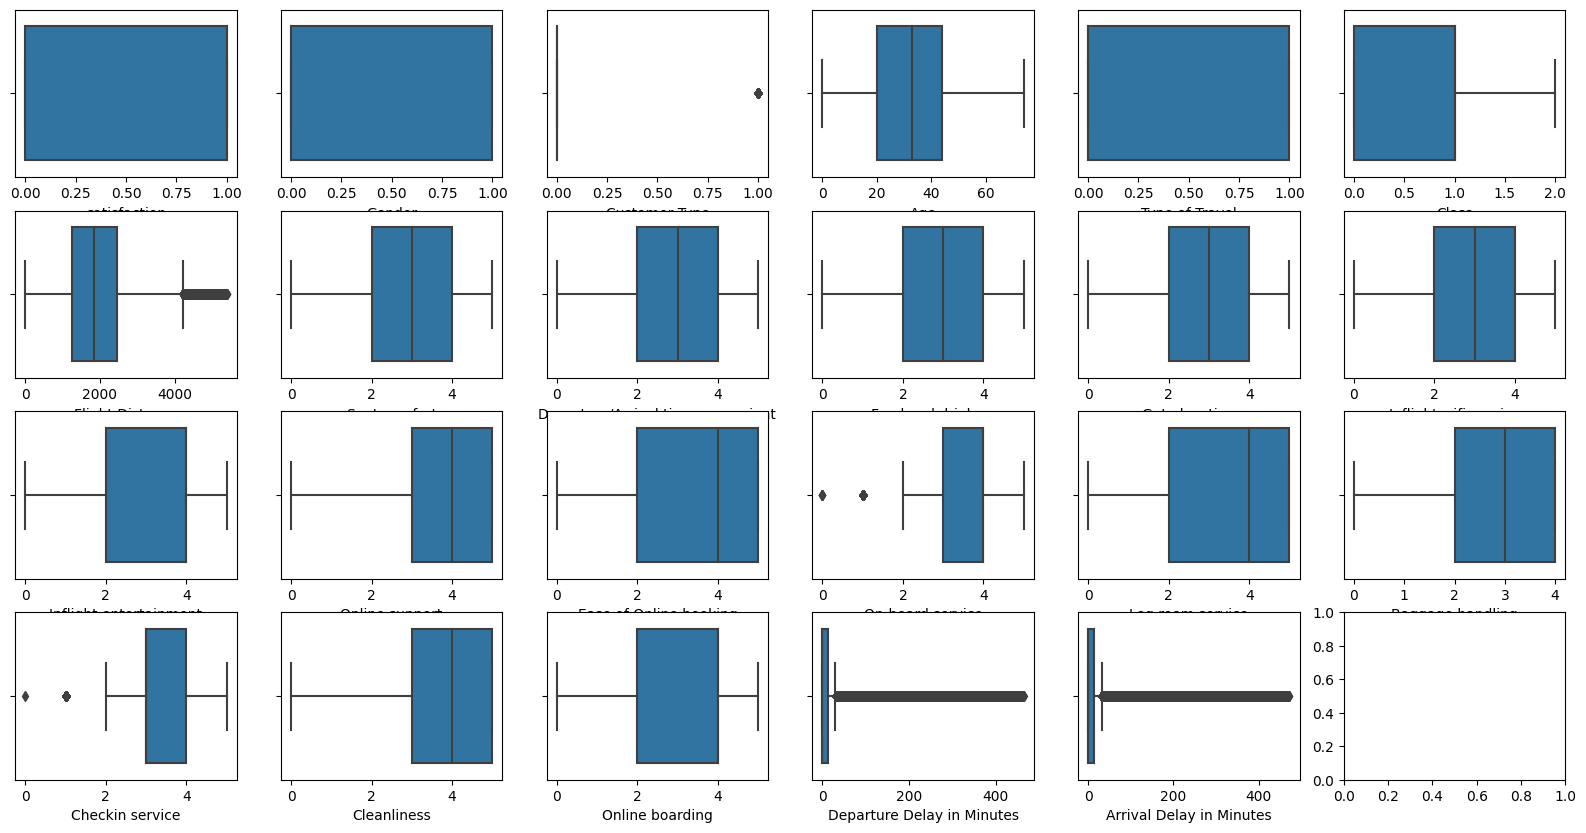

In [ ]:
fig,axes = plt.subplots(4,6,figsize=(20,10))
j = 1
for i in data.columns:
    plt.subplot(4,6,j)
    sns.boxplot(x = data[i])
    j+=1

<Axes: xlabel='Flight Distance'>

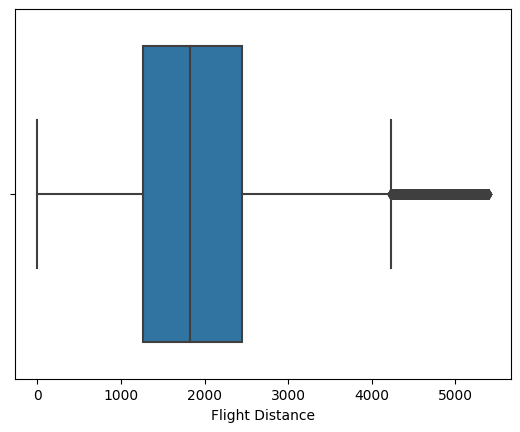

In [ ]:
sns.boxplot(x=data['Flight Distance'])

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfaction                            1.0
Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1185.0
Seat comfort                            2.0
Departure/Arrival time convenient       2.0
Food and drink                          2.0
Gate location                           2.0
Inflight wifi service                   2.0
Inflight entertainment                  2.0
Online support                          2.0
Ease of Online booking                  3.0
On-board service                        1.0
Leg room service                        3.0
Baggage handling                        2.0
Checkin service                         1.0
Cleanliness                             2.0
Online boarding                         2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes        

=> Flight distance has a large amount of outliers.

IQR Method

In [ ]:
sorts=data['Flight Distance'].sort_values()
sorts

102381       0
109539       0
12848        0
11913        0
1652         0
          ... 
15497     5393
27712     5394
69690     5395
102409    5396
49083     5397
Name: Flight Distance, Length: 129880, dtype: int64

In [ ]:
Q1 = data['Flight Distance'].quantile(0.25)
Q3 = data['Flight Distance'].quantile(0.75)
print('Q1',Q1)
print('\nQ3',Q3)
IQR = Q3 - Q1
print('\nIQR',IQR)

Q1 1265.0

Q3 2450.0

IQR 1185.0


In [ ]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('Upper Limit',upper)
print('Lower Limit',lower)

Upper Limit 4227.5
Lower Limit -512.5


In [ ]:
upper_array = np.where(df['Flight Distance']>=upper)[0]
lower_array = np.where(df['Flight Distance']<=lower)[0]

In [ ]:
df['Flight Distance'].drop(index=upper_array, inplace=True)
df['Flight Distance'].drop(index=lower_array, inplace=True)

# ML Models

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

**Encoding categorical data**


The columns - Gender,	Customer Type,	Type of Travel can be one hot encoded as they do not have any ranking

**Applying Label encoding**

In [ ]:
le = LabelEncoder()
data2 = df.copy()
data2['satisfaction'] = le.fit_transform(df['satisfaction'])
data2['Class'] = le.fit_transform(df['Class'])
data2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


**Applying OneHotEncoding**

In [ ]:
X = data2.iloc[ : , 1:].values
y = data2.iloc[ : , 0].values
print("X=", X[0])
print("Y=", y[0])

X= ['Female' 'Loyal Customer' 65 'Personal Travel' 1 265 0 0 0 2 2 4 2 3 3 0
 3 5 3 2 0 0.0]
Y= 1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output = False),[0, 1, 3])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(X[0])

[1.0 0.0 1.0 0.0 0.0 1.0 65 1 265 0 0 0 2 2 4 2 3 3 0 3 5 3 2 0 0.0]


In [ ]:
data2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


**Splitting the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((97410, 25), (97410,), (32470, 25), (32470,))

**Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[: , 6:] = sc.fit_transform(X_train[: , 6:])
X_test[: , 6:] = sc.transform(X_test[: , 6:])

In [ ]:
print(X_test[0])
print(X_test[0])

[1.0 0.0 1.0 0.0 1.0 0.0 -1.2819810182454014 -0.9562548577029213
 0.020544572919801506 0.11727710090993305 0.005672901890083951
 0.1046938189243174 0.009440409024336797 -0.19080760288402904
 -0.28456448183666266 -0.4000212117138995 -0.3617571441784701
 -1.1543221200574691 -1.9223815225301062 -1.4652777492950877
 -1.0621592840280814 -0.6095406823943017 -0.2713713510837636
 0.2715090342523909 0.33650124770457857]
[1.0 0.0 1.0 0.0 1.0 0.0 -1.2819810182454014 -0.9562548577029213
 0.020544572919801506 0.11727710090993305 0.005672901890083951
 0.1046938189243174 0.009440409024336797 -0.19080760288402904
 -0.28456448183666266 -0.4000212117138995 -0.3617571441784701
 -1.1543221200574691 -1.9223815225301062 -1.4652777492950877
 -1.0621592840280814 -0.6095406823943017 -0.2713713510837636
 0.2715090342523909 0.33650124770457857]


# Logistic Regression

**Training the model**

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predictions**

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
score = accuracy_score(y_pred_lr, y_test)
print(score)

0.8349553433939021


In [ ]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     14663
           1       0.85      0.85      0.85     17807

    accuracy                           0.83     32470
   macro avg       0.83      0.83      0.83     32470
weighted avg       0.84      0.83      0.83     32470



# KNN Model

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn  = classifier_knn.predict(X_test)

**Model evaluation**

In [ ]:
score_knn = accuracy_score(y_pred_knn, y_test)
print(score_knn)

0.9212195873113643


In [ ]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     15356
           1       0.91      0.94      0.93     17114

    accuracy                           0.92     32470
   macro avg       0.92      0.92      0.92     32470
weighted avg       0.92      0.92      0.92     32470



# SVM Model

In [ ]:
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

In [ ]:
y_pred_svm  = classifier_svm.predict(X_test)

**Model evalualtion**

In [ ]:
score_svm = accuracy_score(y_pred_svm, y_test)
print(score_svm)

In [ ]:
print(classification_report(y_pred_knn, y_test))

# Decision Tree Model

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt  = classifier_dt.predict(X_test)

**Evaluation**

In [ ]:
score_dt = accuracy_score(y_pred_dt, y_test)
print(score_dt)

0.9392670157068063


In [ ]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14640
           1       0.95      0.94      0.94     17830

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



# Random Forest Model

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

**Model Evaluation**

In [ ]:
score_rf = accuracy_score(y_pred_rf, y_test)
print(score_rf)

0.9576224206960271


In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     15022
           1       0.95      0.97      0.96     17448

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

